# Principal component analyis

## Importing libraries

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import seaborn as sns

from sklearn.preprocessing import StandardScaler

## PCA

In [2]:
# imports scaled covariates
data = pd.read_csv("../../data/cleaned_data/calculable_covariates.csv")
data.drop(columns= ["Unnamed: 0"], inplace=True)
data.head()

,Population,Yes [nbr],No [nbr],65 years or older,Private households,Housing and infrastructure area (%),Total employment,Primary sector,Secondary sector,Tertiary sector,...,urban_typo_Urban municipality in a small or non-agglomerated area (13),mountain_type_Alpes (4),mountain_type_Forêt Noire - Jura Souabe (2),mountain_type_Jura (3),mountain_type_Moyen-pays - Rhin supérieur (1),mountain_type_pas de classification,language_french,language_german,language_italian,language_romansh
0,-0.164167,0.489165,-0.489165,-0.307013,0.314385,-0.120694,-0.150143,-0.427424,-1.282368,1.441427,...,0,0,0,0,1,0,0,1,0,0
1,0.647875,0.743894,-0.743894,-0.274049,0.237145,0.304738,0.318395,-0.925601,-0.436700,1.170845,...,0,0,0,0,1,0,0,1,0,0
2,0.110975,1.002930,-1.002930,-0.645999,-0.003046,-0.046973,-0.108772,-0.762045,-0.944218,1.450993,...,0,0,0,0,1,0,0,1,0,0
3,-0.016428,0.569783,-0.569783,-0.312920,-0.422508,-0.093483,-0.108265,-0.409980,-0.792514,1.018581,...,0,0,0,0,1,0,0,1,0,0
4,-0.017250,0.597685,-0.597685,-0.600710,-0.245290,-0.060566,-0.075212,-0.847127,1.292398,-0.336424,...,0,0,0,0,1,0,0,1,0,0


Transformed Data (Scores):
[[ 0.14991862 -1.15576804  0.35434032 ...  0.22546302 -0.23219091
   0.74634601]
 [ 2.1446215  -1.09476792 -0.46568842 ...  1.22003075 -0.14177867
   0.30200398]
 [ 1.1555137  -2.28645104  0.13368987 ...  0.71405625  0.08736159
   0.34707837]
 ...
 [-0.92674806  1.26715501  1.34967797 ...  1.12856424 -0.44848012
   0.5627906 ]
 [-1.52844237  1.71526563  0.90009267 ... -0.05466484 -0.29940354
  -0.07478657]
 [-1.84621367  2.97891435  1.77344197 ... -2.1673193  -0.84302562
   1.9128228 ]]

Transformed Data (Scores) size:
(2131, 15)

Loadings (Principal Component Weights) larger than 0.4:
                                                      PC1    PC2    PC3  \
Population                                          False  False  False   
Yes [nbr]                                           False  False  False   
No [nbr]                                            False  False  False   
65 years or older                                   False  False  False   
Priva

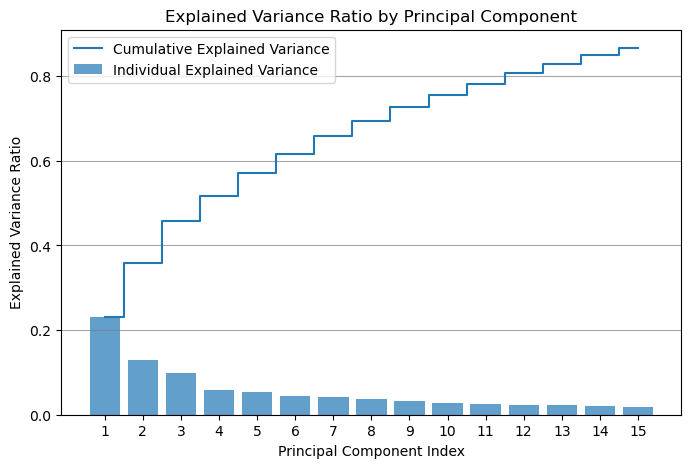

In [63]:
# defines dataframe 
df = data

# Step 1: Scale the data (if required)
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df)

# Step 2: Perform PCA
nbr_of_components = 15
pca = PCA(n_components=nbr_of_components)  # Specify the number of components
transformed_data = pca.fit_transform(data)  # Transformed data (scores)
loadings = pca.components_.T  # Loadings matrix (transpose to align variables with PCs)

# Step 3: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Print Results
print("Transformed Data (Scores):")
print(transformed_data)
print("\nTransformed Data (Scores) size:")
print(transformed_data.shape)
print("\nLoadings (Principal Component Weights) larger than 0.4:")
print(pd.DataFrame(abs(loadings)>0.4, index=data.columns, columns=["PC" + str(i) for i in range(1, nbr_of_components+1)]))
print("\nExplained Variance Ratio (Proportion of Variance Explained by Each Component):")
print(explained_variance)
print("\n Overall explained variance")
print(sum(explained_variance))

# Step 4: Visualization
# 4a. Explained Variance Ratio Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks([i for i in range(1,16)])
plt.legend()
plt.grid(axis="y", color="grey", alpha=0.7)
plt.show()


In [4]:
# calculating the Mean Squared Error
X_reconstructed_pca = pca.inverse_transform(transformed_data)

# Step 3: Calculate the reconstruction error (MSE) for PCA
pca_reconstruction_error = mean_squared_error(df, X_reconstructed_pca)

print(f"PCA Reconstruction Error (MSE): {pca_reconstruction_error:.4f}")


PCA Reconstruction Error (MSE): 0.0926


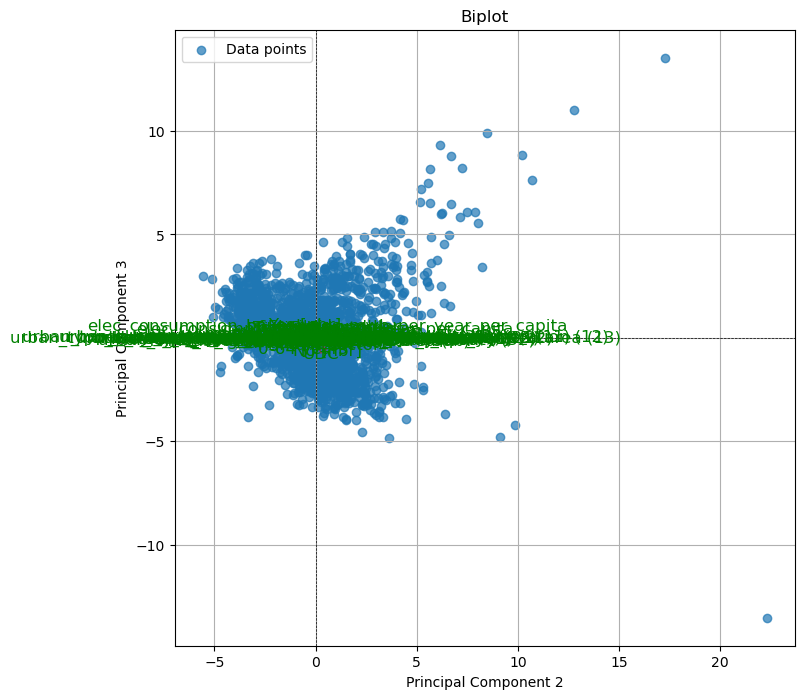

In [5]:
# 4b. Biplot
def biplot(scores, loadings, feature_names, pc1=1, pc2=2):
    plt.figure(figsize=(8, 8))
    # Plot scores
    plt.scatter(scores[:, pc1], scores[:, pc2], alpha=0.7, label='Data points')
    
    # Plot loadings
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[i, pc1] * 2, loadings[i, pc2] * 2, color='r', alpha=0.5)
        plt.text(loadings[i, pc1] * 2.1, loadings[i, pc2] * 2.1, feature, color='g', ha='center', va='center', fontsize=12)
    
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.title('Biplot')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.legend()
    plt.show()

biplot(transformed_data, loadings, data.columns)

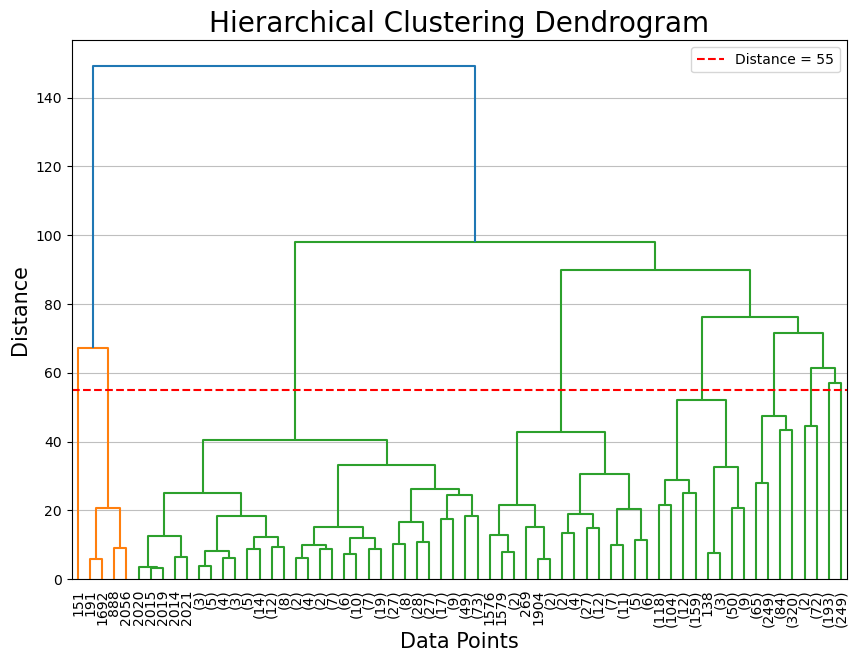

In [62]:
# Perform hierarchical/agglomerative clustering
Z = linkage(transformed_data, method='ward')  # 'ward' minimizes the variance of clusters being merged

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=6)  # Truncated at 20 levels
plt.axhline(y=55, color='r', linestyle='--', label='Distance = 55')  # Add horizontal line at 55
plt.title('Hierarchical Clustering Dendrogram', size=20)
plt.xlabel('Data Points', size=15)
plt.xticks(size=10, rotation=90)
plt.ylabel('Distance', size=15)
plt.legend()  # Add legend for the horizontal line
plt.grid(color="grey", axis="y", alpha=0.5)
plt.show()


Ward’s Method: The distance represents the increase in within-cluster variance when two clusters are merged. It minimizes the sum of squared differences from the mean.

In [7]:
# Set the number of clusters or distance threshold
num_clusters = 8  # Example: 4 clusters
# Alternatively, set a distance threshold
distance_threshold = 55  # Example distance

# Retrieve clusters by specifying the number of clusters
clusters_by_number = fcluster(Z, num_clusters, criterion='maxclust')

# Retrieve clusters by specifying a distance threshold
clusters_by_distance = fcluster(Z, distance_threshold, criterion='distance')

# Display the clusters
print(f"Clusters (by number of clusters): {clusters_by_number}")
print(f"Clusters (by distance threshold): {clusters_by_distance}")


Clusters (by number of clusters): [5 5 5 ... 8 8 8]
Clusters (by distance threshold): [5 5 5 ... 9 9 9]


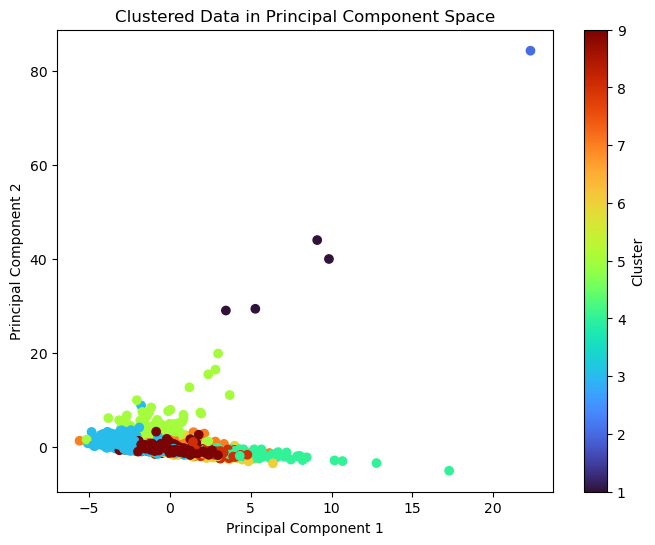

In [64]:
# TODO : to be modified if desired 
clusters_plot = clusters_by_distance

# Plot clusters in the first two dimensions 
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 1], transformed_data[:, 0], c=clusters_plot, cmap='turbo', marker='o')
plt.title('Clustered Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## Attributing types 

In [9]:
Covariates_df = pd.read_csv("../../data/cleaned_data/Covariates.csv")
Covariates_df.head()

,MunicipalityNumber,MunicipalityName,urban_typo,mountain_type,Population,language,Canton,Yes [nbr],No [nbr],65 years or older,...,elec_consumption_households_mwh_per_year_per_capita,elec_consumption_households_mwh_per_year,elec_consumption_mwh_per_year_per_capita,elec_consumption_mwh_per_year,mean_price (cts/kWh),std_price (cts/kWh),building_new_age,building_old,share of people in individual households,new business
0,1.0,Aeugst am Albis,Low-density peri-urban municipality (23),Moyen-pays - Rhin supérieur (1),1998.0,german,Zürich,444.0,335.0,357.0,...,2.9119,5811,4.4623,8905,26.231762,2.464933,998.0,6628.0,0.493,9.0
1,2.0,Affoltern am Albis,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),12859.0,german,Zürich,1884.0,1260.0,2235.0,...,1.6492,21056,4.1840,53420,26.231762,2.464933,2145.0,24610.0,0.209,41.0
2,3.0,Bonstetten,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),5678.0,german,Zürich,1197.0,706.0,921.0,...,1.7356,9827,2.8006,15857,26.231762,2.464933,1404.0,13942.0,0.354,21.0
3,4.0,Hausen am Albis,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),3974.0,german,Zürich,764.0,555.0,675.0,...,2.3004,9128,3.9176,15545,26.231762,2.464933,1325.0,13395.0,0.474,16.0
4,5.0,Hedingen,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),3963.0,german,Zürich,809.0,580.0,632.0,...,2.1157,8335,5.3155,20941,26.231762,2.464933,1219.0,10773.0,0.432,14.0


In [65]:
# To change depending on the clustering I want 
clusters = clusters_by_distance

Covariates_trans_df = data.copy()
Covariates_trans_df["municipality_type"] = clusters
Covariates_df["municipality_type"] = clusters

Covariates_trans_df.loc[(Covariates_trans_df["municipality_type"] == 1) | (Covariates_trans_df["municipality_type"] == 2), "municipality_type"] = 1
Covariates_df.loc[(Covariates_trans_df["municipality_type"] == 1) | (Covariates_df["municipality_type"] == 2), "municipality_type"] = 1

for i in range(3, 10):
    Covariates_trans_df.loc[(Covariates_trans_df["municipality_type"] == i), "municipality_type"] = i-1
    Covariates_df.loc[(Covariates_df["municipality_type"] == i), "municipality_type"] = i-1


In [66]:
Covariates_df.head()

,MunicipalityNumber,MunicipalityName,urban_typo,mountain_type,Population,language,Canton,Yes [nbr],No [nbr],65 years or older,...,elec_consumption_households_mwh_per_year,elec_consumption_mwh_per_year_per_capita,elec_consumption_mwh_per_year,mean_price (cts/kWh),std_price (cts/kWh),building_new_age,building_old,share of people in individual households,new business,municipality_type
0,1.0,Aeugst am Albis,Low-density peri-urban municipality (23),Moyen-pays - Rhin supérieur (1),1998.0,german,Zürich,444.0,335.0,357.0,...,5811,4.4623,8905,26.231762,2.464933,998.0,6628.0,0.493,9.0,4
1,2.0,Affoltern am Albis,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),12859.0,german,Zürich,1884.0,1260.0,2235.0,...,21056,4.1840,53420,26.231762,2.464933,2145.0,24610.0,0.209,41.0,4
2,3.0,Bonstetten,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),5678.0,german,Zürich,1197.0,706.0,921.0,...,9827,2.8006,15857,26.231762,2.464933,1404.0,13942.0,0.354,21.0,4
3,4.0,Hausen am Albis,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),3974.0,german,Zürich,764.0,555.0,675.0,...,9128,3.9176,15545,26.231762,2.464933,1325.0,13395.0,0.474,16.0,4
4,5.0,Hedingen,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),3963.0,german,Zürich,809.0,580.0,632.0,...,8335,5.3155,20941,26.231762,2.464933,1219.0,10773.0,0.432,14.0,4


In [104]:
typologies_df = Covariates_trans_df.groupby("municipality_type").mean()
typologies_df.columns

Index(['Population', 'Yes [nbr]', 'No [nbr]', '65 years or older',
       'Private households', 'Housing and infrastructure area (%)',
       'Total employment', 'Primary sector', 'Secondary sector',
       'Tertiary sector', 'Social assistance rate', 'PLR', 'PDC', 'PS', 'UDC',
       'PEV/PCS', 'PVL', 'PBD', 'PST/Sol.', 'PES', 'Small right-wing parties',
       '0-64 years', 'Municipal_rev [CHF]', 'revenue_per_capita [CHF]',
       'elec_consumption_households_mwh_per_year_per_capita',
       'elec_consumption_households_mwh_per_year',
       'elec_consumption_mwh_per_year_per_capita',
       'elec_consumption_mwh_per_year', 'mean_price (cts/kWh)',
       'std_price (cts/kWh)', 'building_new_age', 'building_old',
       'share of people in individual households', 'new business',
       'urban_typo_Centrally located rural municipality (32)',
       'urban_typo_High-density peri-urban municipality (21)',
       'urban_typo_Low-density peri-urban municipality (23)',
       'urban_typo_Me

In [105]:
data_categories = [
    # Demographics
    "Population", "65 years or older", 
    "0-64 years", "share of people in individual households",
    
    # Housing
    "Private households", "Housing and infrastructure area (%)", 
    "building_new_age", "building_old",
    
    # Economics
    "Municipal_rev [CHF]", "revenue_per_capita [CHF]", 
    "Total employment", "Primary sector", "Secondary sector", 
    "Tertiary sector", "new business",

    # Energy
    'elec_consumption_households_mwh_per_year_per_capita',
    'elec_consumption_households_mwh_per_year',
    'elec_consumption_mwh_per_year_per_capita',
    'elec_consumption_mwh_per_year', 
    'mean_price (cts/kWh)',
    'std_price (cts/kWh)', 
    
    # Politics
    "Yes [nbr]", "No [nbr]",
    "Social assistance rate", "PLR", "PDC", "PS", "UDC", 
    "PEV/PCS", "PVL", "PBD", "PST/Sol.", "PES", "Small right-wing parties",
    
    # Urban Type
    "urban_typo_Centrally located rural municipality (32)",
    "urban_typo_High-density peri-urban municipality (21)",
    "urban_typo_Low-density peri-urban municipality (23)",
    "urban_typo_Medium-density peri-urban municipality (22)",
    "urban_typo_Peripheral rural municipality (33)",
    "urban_typo_Rural center municipality (31)",
    "urban_typo_Urban municipality in a large agglomeration (11)",
    "urban_typo_Urban municipality in a medium-sized agglomeration (12)",
    "urban_typo_Urban municipality in a small or non-agglomerated area (13)",
    
    # Geography
    "mountain_type_Alpes (4)",
    "mountain_type_Forêt Noire - Jura Souabe (2)",
    "mountain_type_Jura (3)",
    "mountain_type_Moyen-pays - Rhin supérieur (1)",
    "mountain_type_pas de classification",
    
    # Language
    "language_french", "language_german", "language_italian", 
    "language_romansh"
]

typologies_df_ordered = typologies_df[data_categories]


In [111]:
nice_column_names = data_categories = [
    # Demographics
    "Population",  "65 years or older", 
    "0-64 years", "share of people in individual households",
    
    # Housing
    "Private households", "Housing and infrastructure area (%)", 
    "new buildings", "old buildings",
    
    # Economics
    "Municipal revenue", "revenue per capita", 
    "Total employment", "Primary sector", "Secondary sector", 
    "Tertiary sector", "new business",

    # Energy
    'electricity consumption households mwh per year per capita',
    'elec consumption households mwh per year',
    'elec consumption mwh per year per capita',
    'elec consumption mwh per year',
    'mean price (cts/kWh)',
    'std price (cts/kWh)',

    # Politics
    "Yes to climate innovation act", 
    "No to climate innovation act",
    "Social assistance rate", 
    "Free Democratic Party(FDP)",
    "Christian Democratic People's Party (CVP/PDC)",
    "Social Democratic Party (SPS/PS)",
    "Swiss People's Party (SVP/UDC)", 
    "Evangelical People's Party (EVP/PEV) / Christian Social Party (CSP/PCS)", 
    "Green Liberal Party (GLP/PVL)",
    "Conservative Democratic Party (BDP/PBD)",
    "Swiss Labour Party (PST/POP) / Solidarity (Sol.)",
    "Ecologist Party (PES)",
    "Small right-wing parties",
    
    # Urban Type
    "urban typo Centrally located rural municipality",
    "urban typo High-density peri-urban municipality",
    "urban typo Low-density peri-urban municipality",
    "urban typo Medium-density peri-urban municipality",
    "urban typo Peripheral rural municipality",
    "urban typo Rural center municipality",
    "urban typo Urban municipality in a large agglomeration",
    "urban typo Urban municipality in a medium-sized agglomeration",
    "urban typo Urban municipality in a small or non-agglomerated area",
    
    # Geography
    "mountain type Alps",
    "mountain type Black forest - Jura Souabe",
    "mountain type Jura",
    "mountain type countryside",
    "non-mountainous",
    
    # Language
    "language french", "language german", "language italian", 
    "language romansh"
]
typologies_df_ordered.columns = nice_column_names
typologies_df_ordered["Population"]

municipality_type
1    16.106733
2    -0.137891
3    -0.257907
4     0.395152
5    -0.167845
6    -0.087340
7    -0.147490
8    -0.141845
Name: Population, dtype: float64

In [112]:
typologies_df_normalized = typologies_df_ordered.copy()
typologies_df_min_max = typologies_df_ordered.copy()

for col in typologies_df_normalized.columns:
    typologies_df_normalized[col] = (typologies_df_normalized[col]-typologies_df_normalized[col].mean())/typologies_df_normalized[col].std()
    typologies_df_min_max[col] = (typologies_df_min_max[col]-typologies_df_min_max[col].min())/(typologies_df_min_max[col].max()-typologies_df_min_max[col].min())


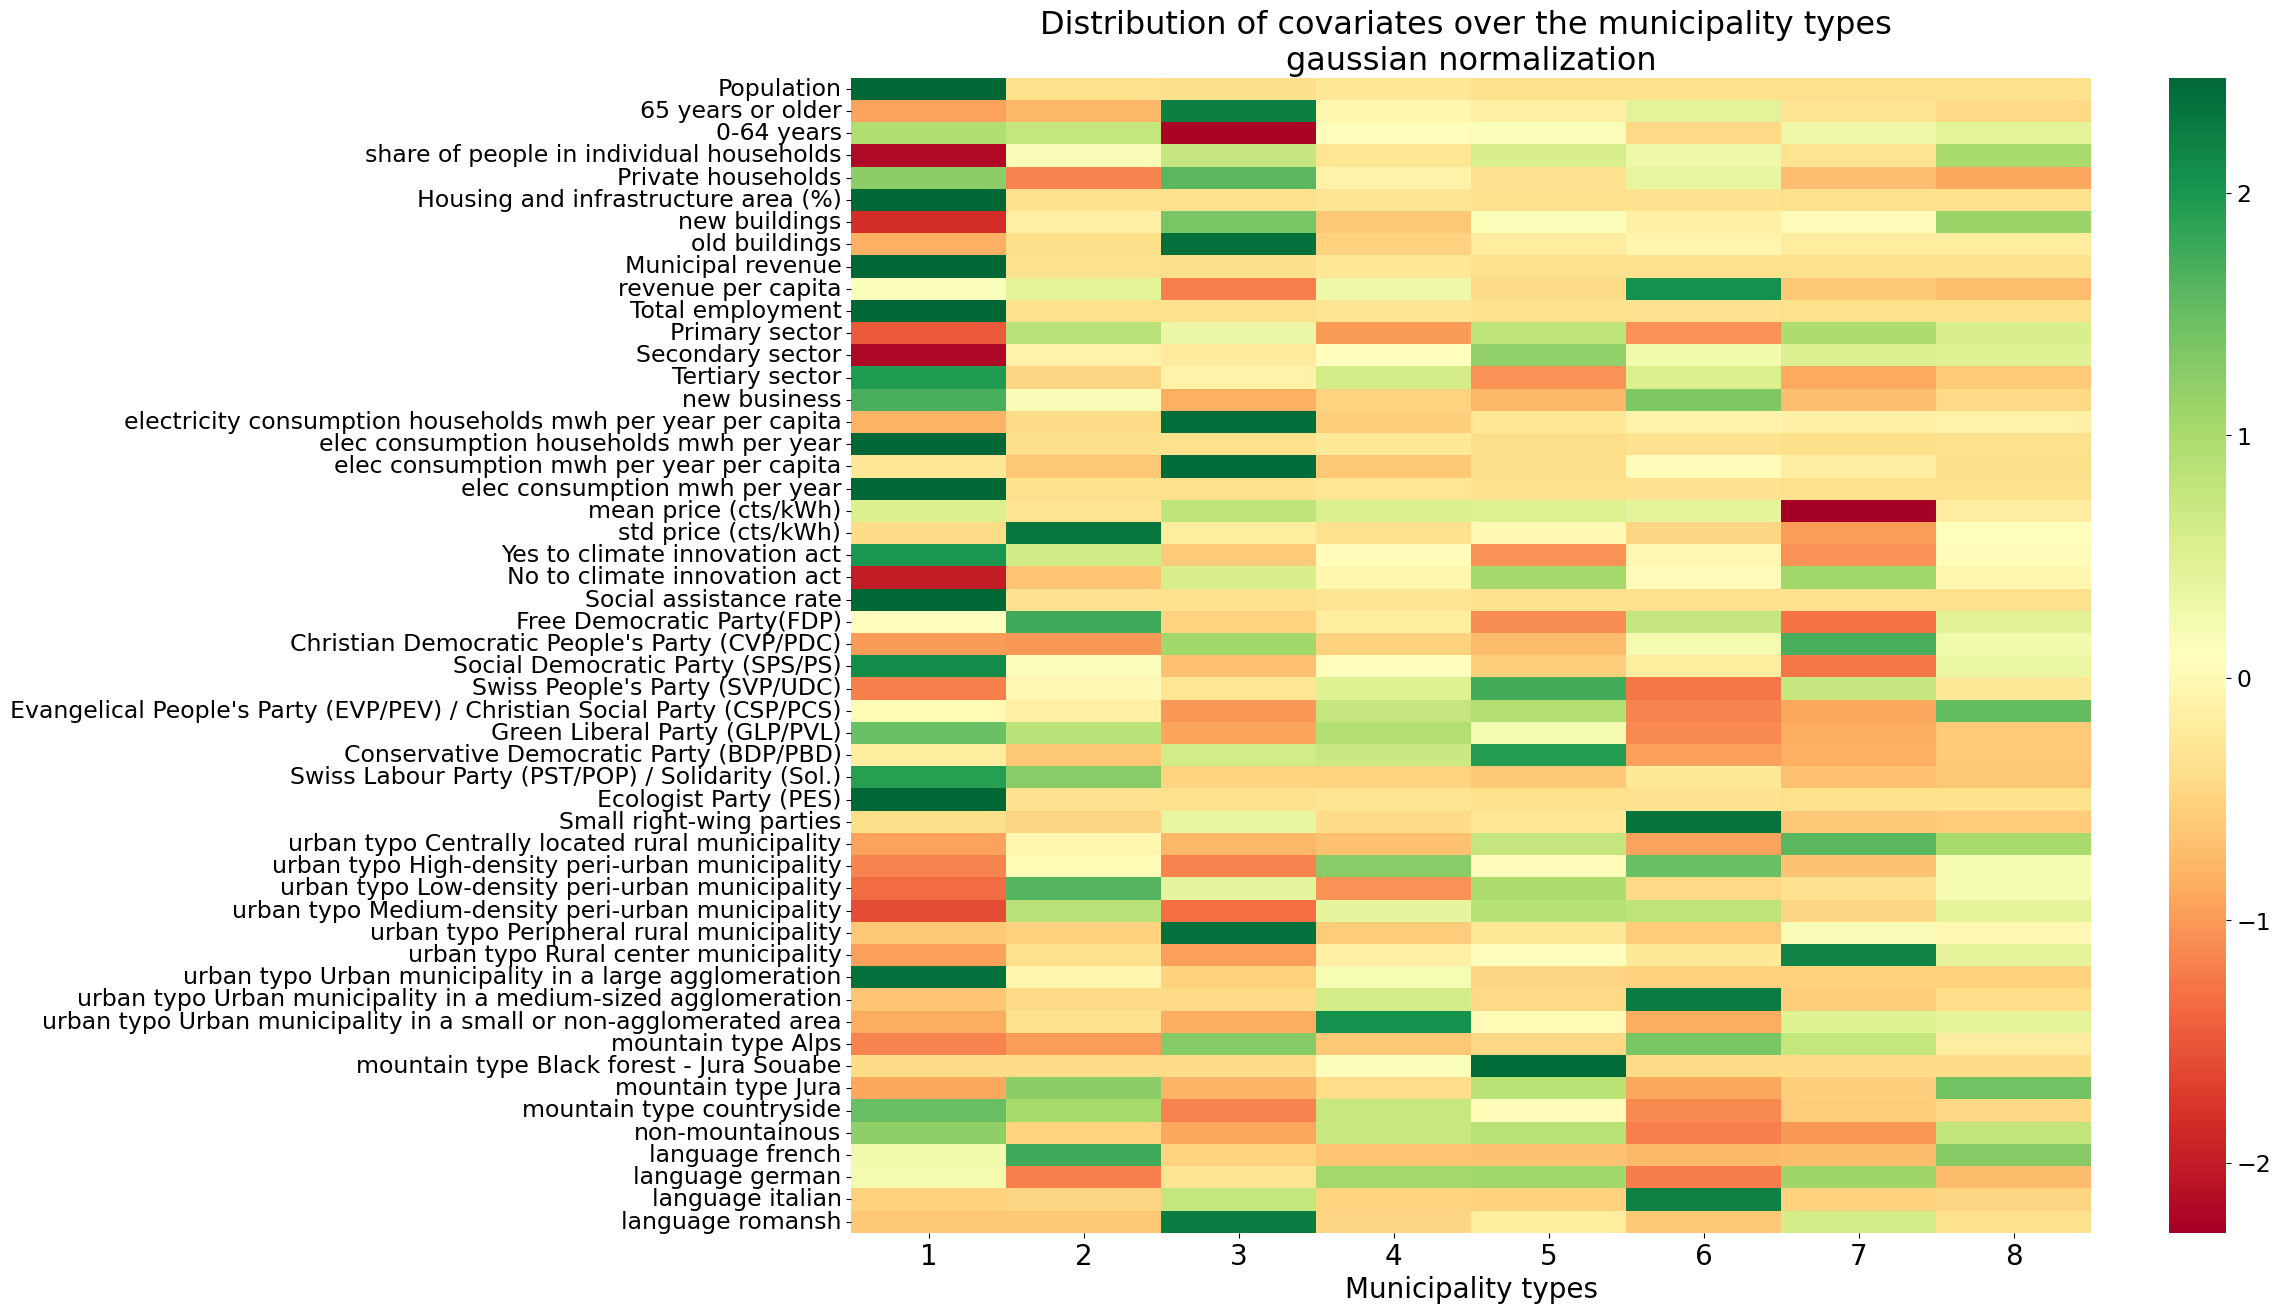

In [113]:
# Create a heatmap of the DataFrame
plt.figure(figsize=(20, 15))
ax = sns.heatmap(typologies_df_normalized.T, annot=False, fmt='g', cmap='RdYlGn', cbar=True)

# Increase the font size of the colorbar ticks
cbar = ax.collections[0].colorbar  # Access the colorbar
cbar.ax.tick_params(labelsize=17)  # Adjust size as needed

# Add labels and title
plt.title("Distribution of covariates over the municipality types \ngaussian normalization", size=23,)
plt.xlabel("Municipality types", size=20)
#plt.ylabel("Covariates")
plt.xticks(size=20)
plt.yticks(size=17)
plt.show()

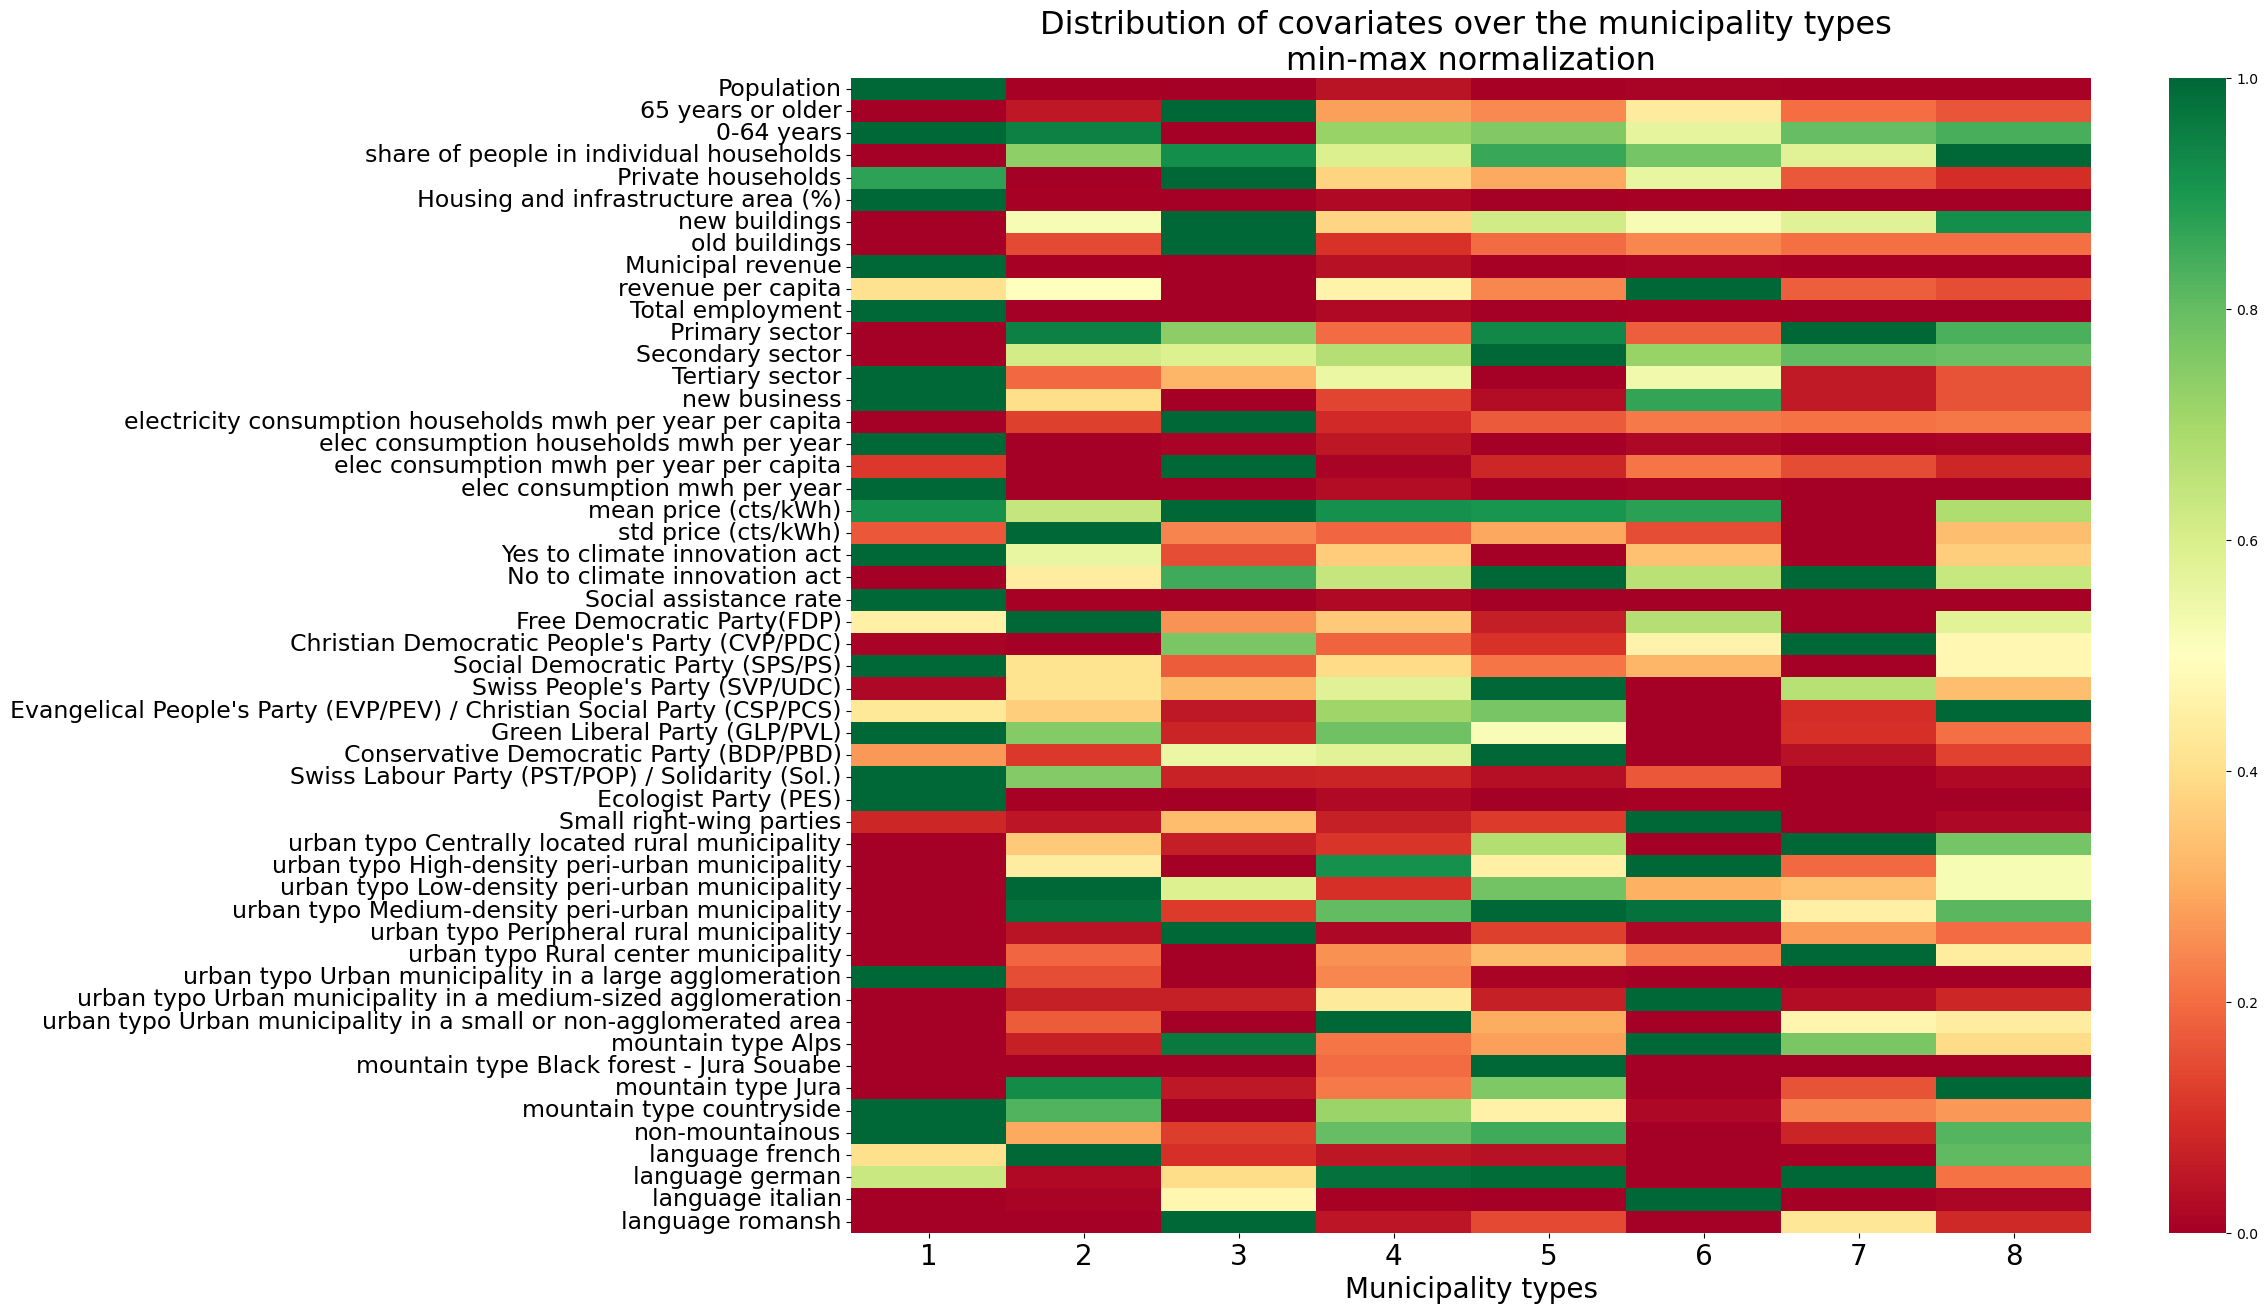

In [114]:
# Create a heatmap of the DataFrame
plt.figure(figsize=(20, 15))
sns.heatmap(typologies_df_min_max.T, annot=False, fmt='g', cmap='RdYlGn', cbar=True)

# Increase the font size of the colorbar ticks
cbar = ax.collections[0].colorbar  # Access the colorbar
cbar.ax.tick_params(labelsize=17)  # Adjust size as needed

# Add labels and title
plt.title("Distribution of covariates over the municipality types \nmin-max normalization", size=23,)
plt.xlabel("Municipality types", size=20)
#plt.ylabel("Covariates")
plt.xticks(size=20)
plt.yticks(size=17)
plt.show()

In [110]:
Covariates_trans_df["municipality_type"].value_counts()

municipality_type
5    718
4    456
2    354
8    249
7    193
3     82
6     74
1      5
Name: count, dtype: int64

In [103]:
Mean_covariate_values_per_type = Covariates_df.select_dtypes(include='number').groupby("municipality_type").mean()
Mean_covariate_values_per_type

,MunicipalityNumber,Population,Yes [nbr],No [nbr],65 years or older,Private households,Housing and infrastructure area (%),Total employment,Primary sector,Secondary sector,...,elec_consumption_households_mwh_per_year_per_capita,elec_consumption_households_mwh_per_year,elec_consumption_mwh_per_year_per_capita,elec_consumption_mwh_per_year,mean_price (cts/kWh),std_price (cts/kWh),building_new_age,building_old,share of people in individual households,new business
municipality_type,,,,,,,,,,,,,,,,,,,,,
1,3104.000000,219620.200000,41020.600000,11597.400000,34186.000000,103353.400000,14422.452111,235114.000000,135.600000,19028.200000,...,1.186620,255112.600000,6.097740,1.316215e+06,27.491699,3.301292,10783.200000,234701.000000,0.054400,1567.200000
2,5708.677966,2349.432203,378.629944,182.463277,382.536723,905.217514,64.871325,1062.547401,46.699140,308.507508,...,2.322292,4279.901130,4.766709,1.147495e+04,26.427247,6.581146,696.500000,5450.000000,0.375983,15.954733
3,4883.817073,744.231707,114.691358,118.271605,208.792683,356.341463,3.409155,423.557143,42.828947,93.946667,...,10.180950,6613.865854,16.198610,1.086320e+04,27.965094,3.505003,537.804878,8852.012195,0.455146,4.540000
4,2155.734649,9478.853070,1434.072368,974.269737,1752.353070,4064.771930,300.508753,5548.194631,80.484375,1122.076923,...,1.986637,16158.440789,4.861987,4.736594e+04,27.497709,3.367323,2020.394737,19443.673246,0.313046,46.529954
5,2359.413649,1948.800836,249.195258,304.736402,354.667131,799.555710,23.573386,801.357447,84.533426,289.502122,...,2.705841,4859.300836,5.661453,1.168069e+04,27.481839,3.784547,803.240947,6811.973538,0.428347,9.023758
6,5197.797297,3025.554054,412.216216,336.837838,677.662162,1361.540541,94.547371,2059.557377,29.682540,552.422535,...,3.188481,8458.716216,7.207393,2.126692e+04,27.354685,3.233176,977.608108,11075.364865,0.391770,22.800000
7,2683.082902,2210.770833,294.184211,354.557895,375.682292,875.661458,18.395838,1062.375000,125.371728,316.032086,...,3.052039,5682.963731,6.424351,1.366708e+04,23.838433,2.594880,879.411458,6750.713542,0.307323,10.830882
8,4000.855422,2296.546185,326.313253,235.562249,379.152610,882.032129,25.949480,903.244813,68.259109,243.654321,...,3.124360,6937.698795,5.684148,1.418037e+04,26.592847,3.956466,1335.891129,8054.979839,0.490068,12.279793


In [97]:
Covariates_trans_df["municipality_type"].value_counts().sum()

2131

In [18]:
Covariates_trans_df

,Population,Yes [nbr],No [nbr],65 years or older,Private households,Housing and infrastructure area (%),Total employment,Primary sector,Secondary sector,Tertiary sector,...,mountain_type_Alpes (4),mountain_type_Forêt Noire - Jura Souabe (2),mountain_type_Jura (3),mountain_type_Moyen-pays - Rhin supérieur (1),mountain_type_pas de classification,language_french,language_german,language_italian,language_romansh,municipality_type
0,-0.164167,0.489165,-0.489165,-0.307013,0.314385,-0.120694,-0.150143,-0.427424,-1.282368,1.441427,...,0,0,0,1,0,0,1,0,0,4
1,0.647875,0.743894,-0.743894,-0.274049,0.237145,0.304738,0.318395,-0.925601,-0.436700,1.170845,...,0,0,0,1,0,0,1,0,0,4
2,0.110975,1.002930,-1.002930,-0.645999,-0.003046,-0.046973,-0.108772,-0.762045,-0.944218,1.450993,...,0,0,0,1,0,0,1,0,0,4
3,-0.016428,0.569783,-0.569783,-0.312920,-0.422508,-0.093483,-0.108265,-0.409980,-0.792514,1.018581,...,0,0,0,1,0,0,1,0,0,4
4,-0.017250,0.597685,-0.597685,-0.600710,-0.245290,-0.060566,-0.075212,-0.847127,1.292398,-0.336424,...,0,0,0,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,-0.216803,1.439041,-1.439041,1.300934,0.915934,-0.145444,-0.135460,0.976970,-0.742133,-0.229449,...,0,0,1,0,0,1,0,0,0,8
2127,-0.234522,0.823919,-0.823919,1.671047,1.453821,-0.145662,-0.125552,0.096654,2.213896,-1.924052,...,0,0,1,0,0,1,0,0,0,8
2128,-0.228765,-0.056895,0.056895,1.188930,0.615510,-0.144153,-0.153470,0.608407,-0.562490,-0.058451,...,0,0,1,0,0,1,0,0,0,8
2129,-0.286410,0.082770,-0.082770,1.640306,0.609963,-0.148536,-0.178423,1.634274,-0.027641,-1.395676,...,0,0,0,0,1,1,0,0,0,8


In [19]:
Covariates_trans_df[Covariates_trans_df["municipality_type"]==2]
Covariates_df[Covariates_df["municipality_type"]==2]

,MunicipalityNumber,MunicipalityName,urban_typo,mountain_type,Population,language,Canton,Yes [nbr],No [nbr],65 years or older,...,elec_consumption_households_mwh_per_year,elec_consumption_mwh_per_year_per_capita,elec_consumption_mwh_per_year,mean_price (cts/kWh),std_price (cts/kWh),building_new_age,building_old,share of people in individual households,new business,municipality_type
224,406.0,Hasle bei Burgdorf,Medium-density peri-urban municipality (22),Alpes (4),3397.0,german,Bern / Berne,491.0,471.0,633.0,...,7605,4.6938,16065,50.890780,15.676485,1504.0,10391.0,0.323,15.0,2
244,435.0,La Ferrière,Low-density peri-urban municipality (23),Jura (3),532.0,french,Bern / Berne,80.0,52.0,77.0,...,1618,5.0425,2731,26.921801,4.721070,131.0,2674.0,0.412,5.0,2
664,2038.0,Prévondavaux,Centrally located rural municipality (32),Moyen-pays - Rhin supérieur (1),97.0,french,Fribourg / Freiburg,13.0,18.0,9.0,...,303,3.1765,378,25.935530,7.632091,9.0,350.0,0.124,NaN,2
666,2043.0,Sévaz,Centrally located rural municipality (32),pas de classification,314.0,french,Fribourg / Freiburg,46.0,35.0,35.0,...,1035,8.0599,2692,27.210539,3.854169,303.0,792.0,0.470,5.0,2
731,2216.0,Pierrafortscha,Low-density peri-urban municipality (23),Moyen-pays - Rhin supérieur (1),150.0,french,Fribourg / Freiburg,33.0,18.0,32.0,...,483,4.7320,724,27.210539,3.854169,0.0,643.0,0.423,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,6640.0,Thônex,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),16690.0,french,Genève,2539.0,935.0,2692.0,...,20391,3.1523,53941,23.603403,2.495537,2900.0,21766.0,0.235,57.0,2
2076,6641.0,Troinex,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),2858.0,french,Genève,653.0,166.0,394.0,...,4510,3.2039,8489,23.603403,2.495537,1068.0,6975.0,0.509,9.0,2
2077,6642.0,Vandoeuvres,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),2958.0,french,Genève,615.0,275.0,478.0,...,6093,3.8667,11734,23.603403,2.495537,990.0,10201.0,0.685,16.0,2
2079,6644.0,Versoix,Urban municipality in a large agglomeration (11),pas de classification,13846.0,french,Genève,1665.0,619.0,2093.0,...,14667,2.7047,35944,23.603403,2.495537,1929.0,17798.0,0.179,64.0,2


In [20]:
Covariates_trans_df.to_csv("../../data/cleaned_data/Covariates_types.csv", index=False)

## Importing PV data

In [21]:
Swiss_solar_potential = pd.read_csv("../../data/cleaned_data/Swiss_solar_potential.csv")
Swiss_solar_potential

,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id
0,Aeugst am Albis,ZH,1.910714e+07,1.348543e+07,8.666142e+06,5.140205e+06,177869.927003,184175.446768,1514.66,1514660.0,...,2.62,2.04,1.33,0.72,0.61,15.42,5.02,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1
1,Affoltern am Albis,ZH,6.727411e+07,5.286801e+07,3.796268e+07,2.211373e+07,653710.145217,800320.664453,3988.31,3988310.0,...,11.56,8.71,5.48,2.75,2.22,70.33,20.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2
2,Bonstetten,ZH,2.807809e+07,2.086292e+07,1.442854e+07,7.962732e+06,271607.933081,316012.443845,1620.22,1620220.0,...,4.13,3.16,2.00,1.03,0.82,22.68,9.07,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3
3,Hausen am Albis,ZH,3.620122e+07,2.583782e+07,1.747077e+07,1.067574e+07,342510.943327,371456.902241,3073.58,3073580.0,...,4.86,3.79,2.48,1.38,1.18,29.61,8.82,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,4
4,Hedingen,ZH,2.659854e+07,1.953973e+07,1.247946e+07,7.409044e+06,250280.021025,267799.223428,2708.86,2708860.0,...,3.86,2.95,1.88,0.97,0.79,22.08,7.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Clos du Doubs,JU,2.202651e+07,1.540188e+07,9.230486e+06,5.639726e+06,203218.882899,197414.877889,1520.47,1520470.0,...,3.82,3.08,2.26,1.21,0.89,26.06,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6808
2127,Haute-Ajoie,JU,2.244028e+07,1.720105e+07,8.837971e+06,5.620396e+06,203478.363883,184334.358886,1073.43,1073430.0,...,4.65,3.72,2.63,1.46,1.12,33.54,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6809
2128,La Baroche,JU,1.956048e+07,1.420631e+07,8.351648e+06,5.278561e+06,186315.994717,176702.694863,2117.99,2117990.0,...,3.85,3.08,2.22,1.19,0.91,26.52,4.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6810
2129,Damphreux-Lugnez,JU,6.412274e+06,4.656797e+06,2.726437e+06,1.746839e+06,57963.178088,55074.448769,512.12,512120.0,...,1.48,1.18,0.82,0.44,0.35,10.49,1.44,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6811


In [22]:
Swiss_solar_potential["municipality_type"]=clusters
Swiss_solar_potential[Swiss_solar_potential["municipality_type"]==10]

Swiss_solar_potential.loc[(Swiss_solar_potential["municipality_type"] == 1) | (Swiss_solar_potential["municipality_type"] == 2), "municipality_type"] = 1

for i in range(3, 10):
    Swiss_solar_potential.loc[(Swiss_solar_potential["municipality_type"] == i), "municipality_type"] = i-1

Swiss_solar_potential[Swiss_solar_potential["municipality_type"]==8]


,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type
126,Dättlikon,ZH,5.797906e+06,4.127549e+06,2.874094e+06,1.750318e+06,55060.295905,61471.931041,662.39,662390.0,...,0.73,0.49,0.28,0.23,5.19,2.03,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,215,8
152,Andelfingen,ZH,3.237771e+07,2.379004e+07,1.443825e+07,7.862444e+06,304359.423683,317513.520781,2114.95,2114950.0,...,4.17,2.64,1.40,1.12,33.50,8.69,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,291,8
275,Münchenbuchsee,BE,5.803763e+07,4.912267e+07,3.092757e+07,1.899920e+07,509856.485730,620389.784541,3152.44,3152440.0,...,8.58,5.62,3.21,2.51,72.83,19.67,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,546,8
346,Belprahon,BE,3.318626e+06,2.622223e+06,1.509218e+06,8.831799e+05,31327.712021,33450.911442,228.89,228890.0,...,0.48,0.36,0.21,0.14,3.88,1.04,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,681,8
350,Crémines,BE,6.238252e+06,4.851148e+06,3.055858e+06,1.720444e+06,59736.913100,64643.196407,420.89,420890.0,...,0.90,0.67,0.38,0.29,7.58,1.89,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,691,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Clos du Doubs,JU,2.202651e+07,1.540188e+07,9.230486e+06,5.639726e+06,203218.882899,197414.877889,1520.47,1520470.0,...,3.08,2.26,1.21,0.89,26.06,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6808,8
2127,Haute-Ajoie,JU,2.244028e+07,1.720105e+07,8.837971e+06,5.620396e+06,203478.363883,184334.358886,1073.43,1073430.0,...,3.72,2.63,1.46,1.12,33.54,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6809,8
2128,La Baroche,JU,1.956048e+07,1.420631e+07,8.351648e+06,5.278561e+06,186315.994717,176702.694863,2117.99,2117990.0,...,3.08,2.22,1.19,0.91,26.52,4.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6810,8
2129,Damphreux-Lugnez,JU,6.412274e+06,4.656797e+06,2.726437e+06,1.746839e+06,57963.178088,55074.448769,512.12,512120.0,...,1.18,0.82,0.44,0.35,10.49,1.44,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6811,8


In [23]:
pv_typologies_df = Swiss_solar_potential.groupby("municipality_type")["achieved_rp"].agg(["median", "mean", "std"])
pv_typologies_df

,median,mean,std
municipality_type,,,
1,0.043020,0.040371,0.013975
2,0.066770,0.079851,0.068811
3,0.025011,0.035186,0.052349
4,0.075437,0.082209,0.033585
5,0.077625,0.085299,0.046078
6,0.061544,0.074889,0.044275
7,0.092278,0.106126,0.073318
8,0.082457,0.092562,0.050892


In [24]:
Swiss_solar_potential[Swiss_solar_potential.municipality_type==2]["achieved_rp"]

224     0.152553
244     0.056264
664     0.062729
666     0.658908
731     0.177134
          ...   
2075    0.078373
2076    0.078836
2077    0.038642
2079    0.042352
2080    0.067283
Name: achieved_rp, Length: 354, dtype: float64

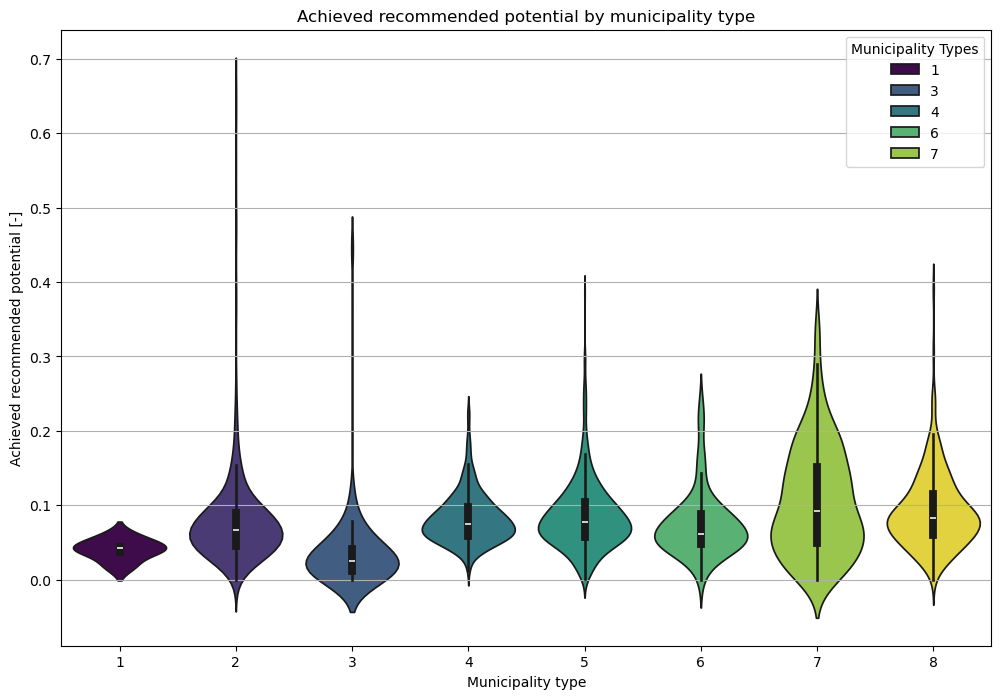

In [25]:
#Swiss_solar_potential.boxplot(column="achieved_rp", by="type", grid=False, figsize=(10, 6))
plotdata = Swiss_solar_potential.copy()
#plotdata.loc[(plotdata["municipality_type"] == 1) | (plotdata["municipality_type"] == 2), "municipality_type"] = 1

plt.figure(figsize=(12,8))
sns.violinplot(x="municipality_type", y="achieved_rp", hue="municipality_type", data=plotdata, palette="viridis")
plt.title("Achieved recommended potential by municipality type")
plt.xlabel("Municipality type")
plt.ylabel("Achieved recommended potential [-]")
plt.legend(title="Municipality Types")
plt.grid(axis="y")
plt.show()

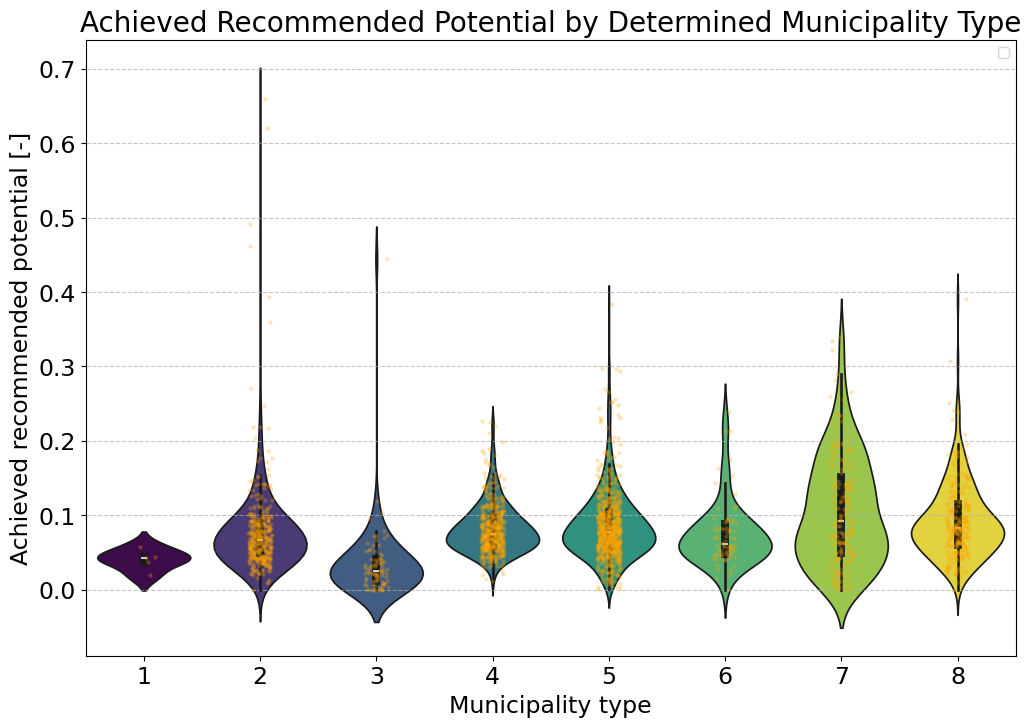

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Swiss_solar_potential DataFrame is already defined

plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(x="municipality_type", y="achieved_rp", hue="municipality_type", data=plotdata, palette="viridis")

# Overlay the swarmplot for individual data points
#sns.swarmplot(x="type", y="achieved_rp", data=Swiss_solar_potential, color="black", size=3, alpha=0.7)
sns.stripplot(x="municipality_type", y="achieved_rp", data=plotdata, color="orange", size=3, alpha=0.3, jitter=True)


# Title and labels
plt.title("Achieved Recommended Potential by Determined Municipality Type", fontsize=20)
plt.xlabel("Municipality type", fontsize=17)
plt.ylabel("Achieved recommended potential [-]", fontsize=17)

# Add grid
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend([])
plt.xticks(size=17)
plt.yticks(size=17)

# Display the plot
plt.show()


In [27]:

# Get the top 10 largest values for each category
top_10_per_category = Swiss_solar_potential.groupby("municipality_type")[["municipality_type", "achieved_rp", "mun_id"]].apply(lambda x: x.nlargest(5, 'achieved_rp')).reset_index(drop=True)

print("\nTop 10 largest values for each category:")
print(top_10_per_category.drop([1, 2, 3]))
print()



Top 10 largest values for each category:
    municipality_type  achieved_rp  mun_id
0                   1     0.057787    2701
4                   1     0.019144    6621
5                   2     0.658908    2043
6                   2     0.620542    5565
7                   2     0.491685    6452
8                   2     0.462240    5629
9                   2     0.393924    5412
10                  3     0.444684    5073
11                  3     0.119579     992
12                  3     0.103791    5260
13                  3     0.095848    2465
14                  3     0.078322    3669
15                  4     0.226849    1062
16                  4     0.225069    2527
17                  4     0.219702    4170
18                  4     0.210057     415
19                  4     0.197816    4421
20                  5     0.384281    4314
21                  5     0.298399     382
22                  5     0.296019    3211
23                  5     0.293700    4232
24          

In [28]:
average_std_top_10 = top_10_per_category.groupby("municipality_type")["achieved_rp"].agg(["mean", "std"]).reset_index()
# Changing groups to include zurich in megacities 

average_std_top_10

,municipality_type,mean,std
0,1,0.040371,0.013975
1,2,0.525460,0.111005
2,3,0.168445,0.155136
3,4,0.215899,0.012037
4,5,0.308434,0.043930
5,6,0.200808,0.030898
6,7,0.313489,0.026017
7,8,0.285881,0.064902


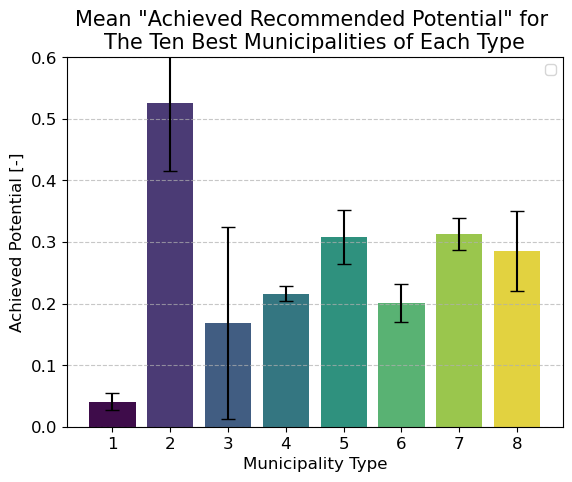

In [29]:
# Create the bar plot without the error bars
sns.barplot(
    x="municipality_type",
    y="mean",
    data=average_std_top_10,
    hue='municipality_type',
    palette="viridis"

)

# Add error bars using plt.errorbar
plt.errorbar(
    x=range(len(average_std_top_10)),
    y=average_std_top_10["mean"],
    yerr=average_std_top_10["std"],
    fmt='none',  # No markers, just error bars
    color='black',
    capsize=5
)

# Customizing the plot
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.title("Mean \"Achieved Recommended Potential\" for \nThe Ten Best Municipalities of Each Type", size=15)
plt.ylabel("Achieved Potential [-]", size=12)
plt.xlabel("Municipality Type", size=12)
plt.xticks(ticks=range(len(average_std_top_10)), labels=average_std_top_10["municipality_type"], rotation=0, size=12)
plt.yticks(size=12)
plt.ylim([0,0.6])
plt.legend([])
plt.show()


In [30]:
Reccommende_potential = Swiss_solar_potential[Swiss_solar_potential.mun_id.isin(top_10_per_category.mun_id)][["recommended_potential", "municipality_type"]]


In [31]:
average_std_top_10_reco = Reccommende_potential.groupby("municipality_type")["recommended_potential"].agg(["mean", "std"]).reset_index()
average_std_top_10_reco

,municipality_type,mean,std
0,1,6.576724e+08,3.166133e+08
1,2,9.645432e+06,6.656697e+06
2,3,2.229855e+07,1.542094e+07
3,4,2.642670e+07,9.958294e+06
4,5,3.920831e+06,2.790685e+06
5,6,1.728289e+07,9.946304e+06
6,7,2.725560e+07,1.770725e+07
7,8,1.868865e+07,1.501815e+07


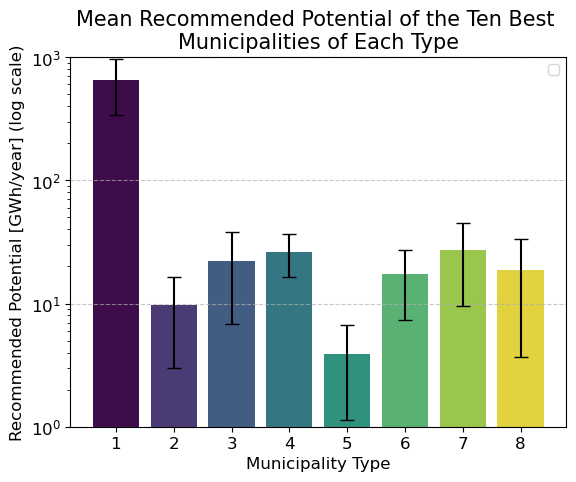

In [32]:
# Create the bar plot without the error bars
sns.barplot(
    x="municipality_type",
    y="mean",
    data=average_std_top_10_reco/(10**6),
    hue='municipality_type',
    palette="viridis"

)

# Add error bars using plt.errorbar
plt.errorbar(
    x=range(len(average_std_top_10_reco)),
    y=average_std_top_10_reco["mean"]/(10**6),
    yerr=average_std_top_10_reco["std"]/(10**6),
    fmt='none',  # No markers, just error bars
    color='black',
    capsize=5
)

# Customizing the plot
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.title("Mean Recommended Potential of the Ten Best \nMunicipalities of Each Type", size=15)
plt.ylabel("Recommended Potential [GWh/year] (log scale)", size=12)
plt.xlabel("Municipality Type", size=12)
plt.xticks(ticks=range(len(average_std_top_10_reco)), labels=average_std_top_10_reco["municipality_type"], rotation=0, size=12)
plt.yticks(size=12)
plt.ylim([1,1000])
plt.legend([])
plt.yscale("log")
plt.show()



In [33]:

# Get the top 10 smallest values for each category
low_10_per_category = Swiss_solar_potential.groupby("municipality_type")[["municipality_type", "achieved_rp", "mun_id"]].apply(lambda x: x.nsmallest(10, 'achieved_rp')).reset_index(drop=True)

print("\nTop 10 smallest values for each category:")
print(low_10_per_category)



Top 10 smallest values for each category:
    municipality_type  achieved_rp  mun_id
0                   1     0.019144    6621
1                   1     0.037818    5586
2                   1     0.043020     351
3                   1     0.044084     261
4                   1     0.057787    2701
..                ...          ...     ...
70                  8     0.021055    5410
71                  8     0.023694    2261
72                  8     0.024754    6267
73                  8     0.025202    5405
74                  8     0.025581    6240

[75 rows x 3 columns]


In [34]:
average_std_low_10 = low_10_per_category.groupby("municipality_type")["achieved_rp"].agg(["mean", "std"]).reset_index()
average_std_low_10

,municipality_type,mean,std
0,1,0.040371,0.013975
1,2,0.015530,0.007183
2,3,0.000510,0.000916
3,4,0.024798,0.007553
4,5,0.005632,0.003162
5,6,0.027671,0.012898
6,7,0.003939,0.003000
7,8,0.019057,0.008015


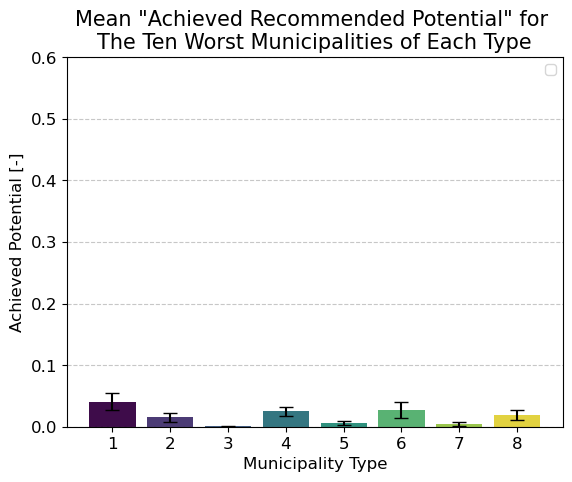

In [35]:
# Create the bar plot without the error bars
sns.barplot(
    x="municipality_type",
    y="mean",
    data=average_std_low_10,
    hue='municipality_type',
    palette="viridis"

)

# Add error bars using plt.errorbar
plt.errorbar(
    x=range(len(average_std_top_10)),
    y=average_std_low_10["mean"],
    yerr=average_std_low_10["std"],
    fmt='none',  # No markers, just error bars
    color='black',
    capsize=5
)

# Customizing the plot
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.title("Mean \"Achieved Recommended Potential\" for \nThe Ten Worst Municipalities of Each Type", size=15)
plt.ylabel("Achieved Potential [-]", size=12)
plt.xlabel("Municipality Type", size=12)
plt.yticks(size=12)
plt.xticks(ticks=range(len(average_std_low_10)), labels=average_std_low_10["municipality_type"], rotation=0, size=12)
plt.ylim([0,0.6])
plt.legend([])
plt.show()

In [36]:
Recommended_potential_low = Swiss_solar_potential[Swiss_solar_potential.mun_id.isin(low_10_per_category.mun_id)][["recommended_potential", "municipality_type"]]


In [37]:
average_std_low_10_reco = Recommended_potential_low.groupby("municipality_type")["recommended_potential"].agg(["mean", "std"]).reset_index()
average_std_low_10_reco

,municipality_type,mean,std
0,1,6.576724e+08,3.166133e+08
1,2,4.612202e+06,4.577998e+06
2,3,4.323195e+06,4.517673e+06
3,4,3.790097e+07,2.137914e+07
4,5,1.961232e+07,2.121175e+07
5,6,2.570764e+07,2.020743e+07
6,7,1.373235e+07,1.871110e+07
7,8,3.722123e+07,4.653066e+07


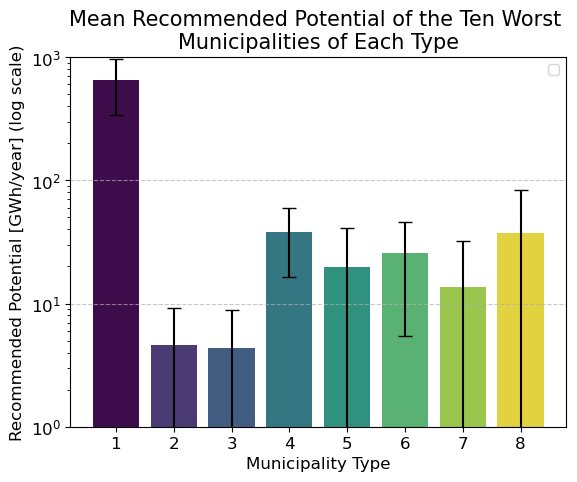

In [38]:
# Create the bar plot without the error bars
sns.barplot(
    x="municipality_type",
    y="mean",
    data=average_std_low_10_reco/(10**6),
    hue='municipality_type',
    palette="viridis"

)

# Add error bars using plt.errorbar
plt.errorbar(
    x=range(len(average_std_low_10_reco)),
    y=average_std_low_10_reco["mean"]/(10**6),
    yerr=average_std_low_10_reco["std"]/(10**6),
    fmt='none',  # No markers, just error bars
    color='black',
    capsize=5
)

# Customizing the plot
plt.grid(axis="y", linestyle='--', alpha=0.7, which="major")
plt.title("Mean Recommended Potential of the Ten Worst \nMunicipalities of Each Type", size=15)
plt.ylabel("Recommended Potential [GWh/year] (log scale)", size=12)
plt.xlabel("Municipality Type", size=12)
plt.xticks(ticks=range(len(average_std_low_10_reco)), labels=average_std_low_10_reco["municipality_type"], rotation=0, size=12)
plt.yticks(size=12)
#plt.ylim([0,0.55])
plt.legend([])
#plt.ylim([0,2*10**8])
plt.yscale("log")
plt.ylim([1, 1000])
plt.show()


In [39]:
#Total swiss current production in TWh/year
Swiss_solar_potential["total_energy"].sum()/10**9

4.93541084

In [40]:
df_to_add = Covariates_df[["MunicipalityNumber","urban_typo"]]

In [41]:
Swiss_solar_potential_final = pd.merge(Swiss_solar_potential, df_to_add, left_on="mun_id", right_on="MunicipalityNumber")

In [42]:
Swiss_solar_potential_final.drop(columns=["MunicipalityNumber"], inplace=True)

In [43]:
Swiss_solar_potential_final.to_csv("../../data/cleaned_data/Municipal_solar_types.csv", index=False)

In [44]:
Swiss_solar_potential_final[Swiss_solar_potential_final.municipality_type==8]

,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type,urban_typo
126,Dättlikon,ZH,5.797906e+06,4.127549e+06,2.874094e+06,1.750318e+06,55060.295905,61471.931041,662.39,662390.0,...,0.49,0.28,0.23,5.19,2.03,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,215,8,Low-density peri-urban municipality (23)
152,Andelfingen,ZH,3.237771e+07,2.379004e+07,1.443825e+07,7.862444e+06,304359.423683,317513.520781,2114.95,2114950.0,...,2.64,1.40,1.12,33.50,8.69,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,291,8,High-density peri-urban municipality (21)
275,Münchenbuchsee,BE,5.803763e+07,4.912267e+07,3.092757e+07,1.899920e+07,509856.485730,620389.784541,3152.44,3152440.0,...,5.62,3.21,2.51,72.83,19.67,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,546,8,High-density peri-urban municipality (21)
346,Belprahon,BE,3.318626e+06,2.622223e+06,1.509218e+06,8.831799e+05,31327.712021,33450.911442,228.89,228890.0,...,0.36,0.21,0.14,3.88,1.04,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,681,8,Centrally located rural municipality (32)
350,Crémines,BE,6.238252e+06,4.851148e+06,3.055858e+06,1.720444e+06,59736.913100,64643.196407,420.89,420890.0,...,0.67,0.38,0.29,7.58,1.89,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,691,8,Centrally located rural municipality (32)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,Clos du Doubs,JU,2.202651e+07,1.540188e+07,9.230486e+06,5.639726e+06,203218.882899,197414.877889,1520.47,1520470.0,...,2.26,1.21,0.89,26.06,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6808,8,Peripheral rural municipality (33)
2127,Haute-Ajoie,JU,2.244028e+07,1.720105e+07,8.837971e+06,5.620396e+06,203478.363883,184334.358886,1073.43,1073430.0,...,2.63,1.46,1.12,33.54,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6809,8,Peripheral rural municipality (33)
2128,La Baroche,JU,1.956048e+07,1.420631e+07,8.351648e+06,5.278561e+06,186315.994717,176702.694863,2117.99,2117990.0,...,2.22,1.19,0.91,26.52,4.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6810,8,Peripheral rural municipality (33)
2129,Damphreux-Lugnez,JU,6.412274e+06,4.656797e+06,2.726437e+06,1.746839e+06,57963.178088,55074.448769,512.12,512120.0,...,0.82,0.44,0.35,10.49,1.44,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6811,8,Peripheral rural municipality (33)
